# Advanced Lane Finding Project - [P2.ipynb](./P2.ipynb)

### Camera Calibration

Compute the camera matrix and distortion coefficients.

Output images appear in the [./output_images](./output_images) folder.

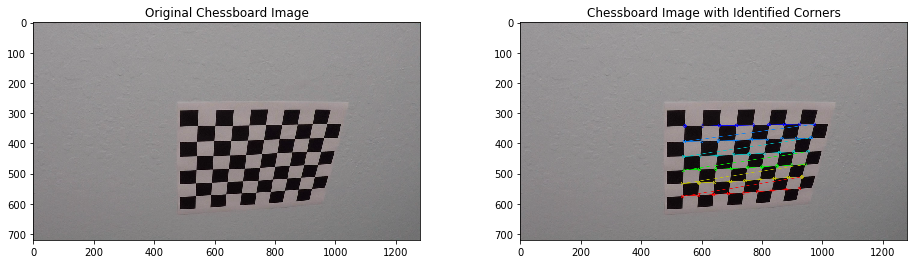

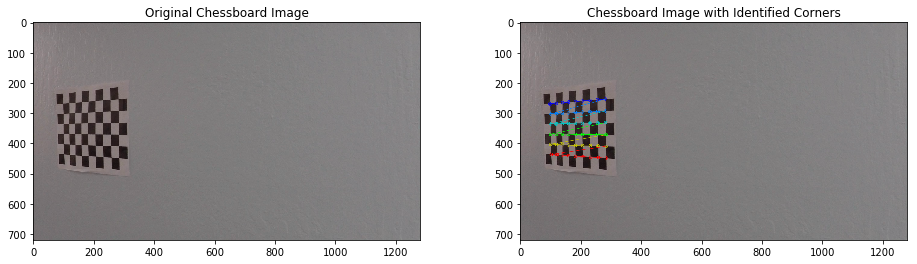

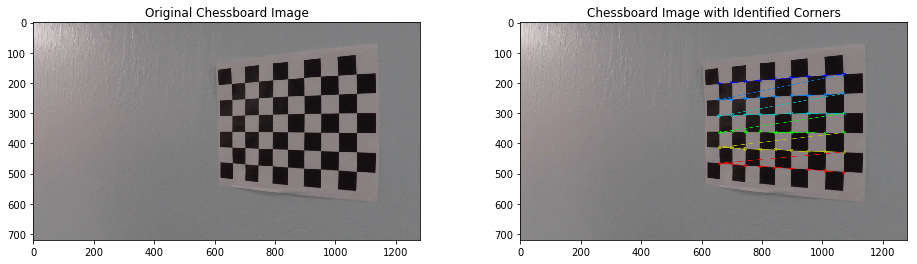

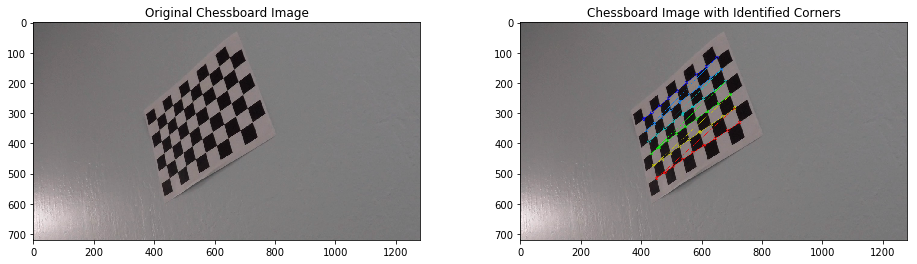

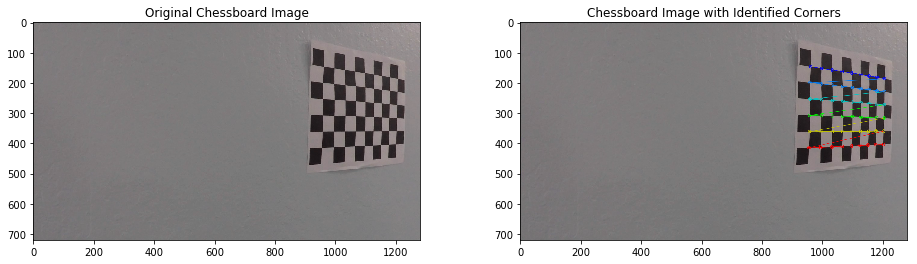

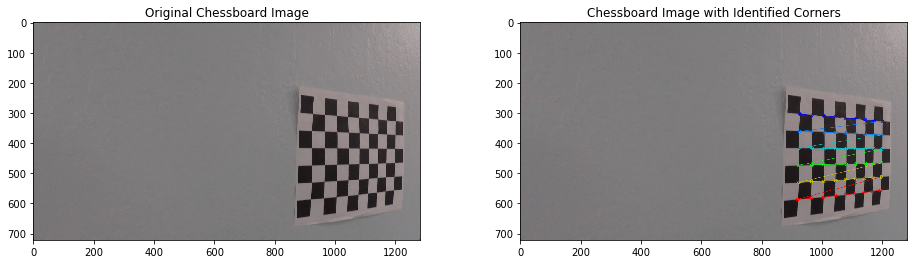

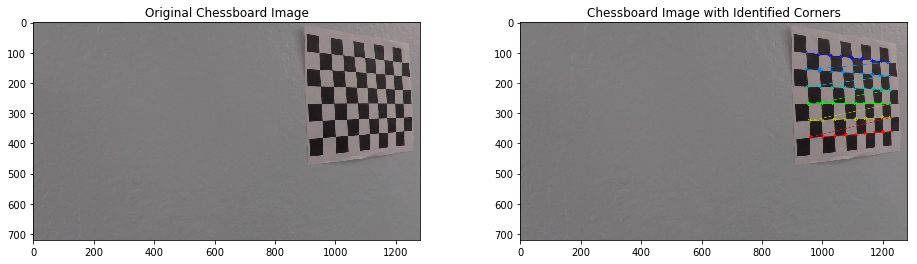

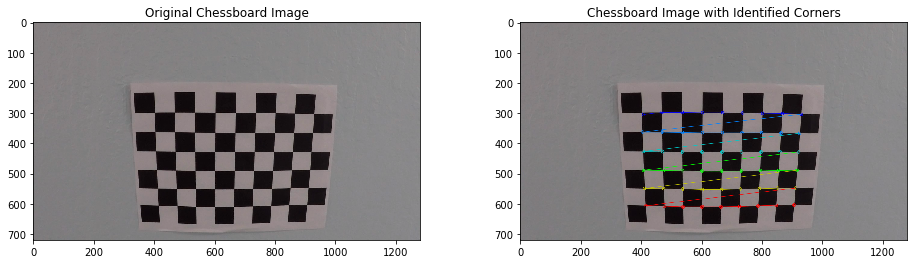

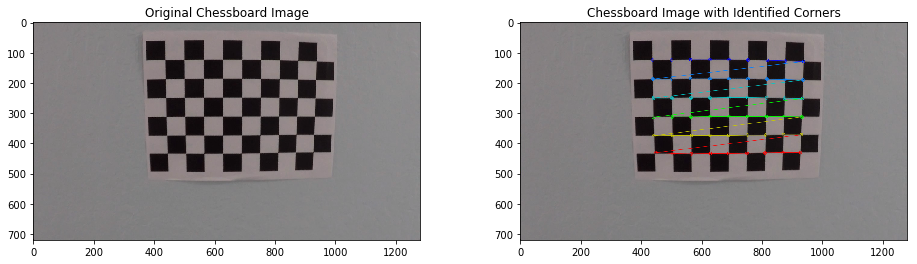

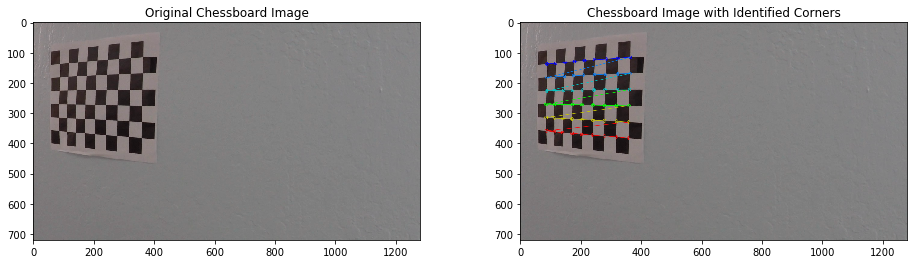

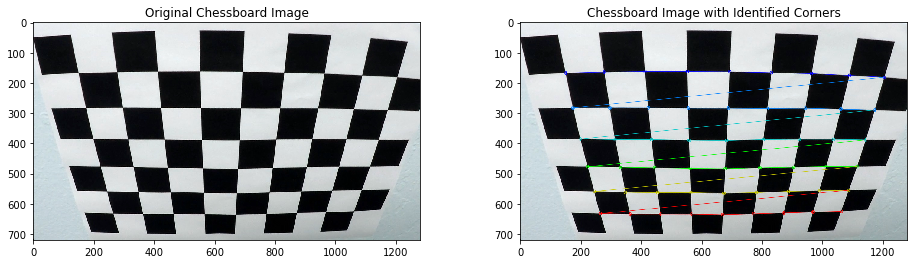

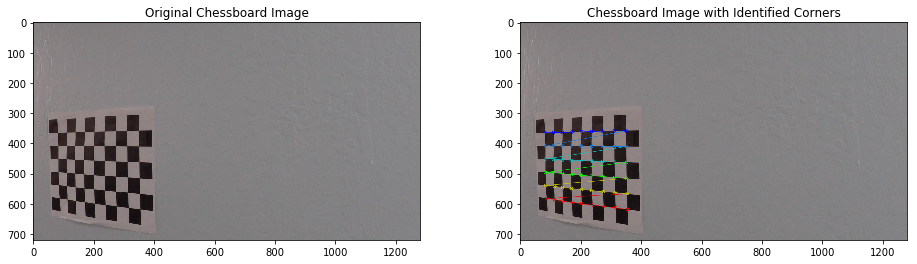

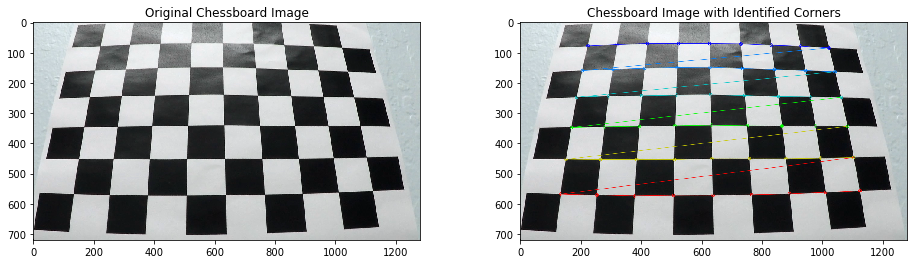

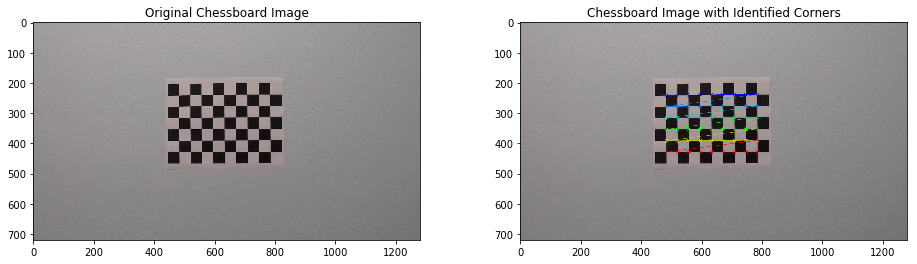

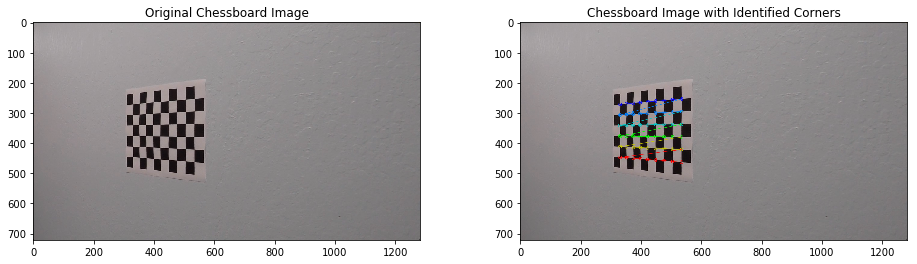

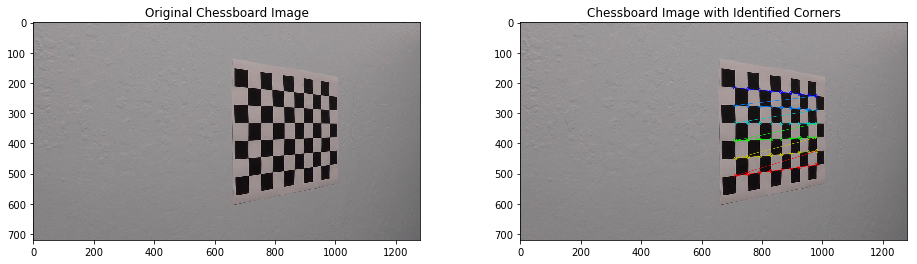

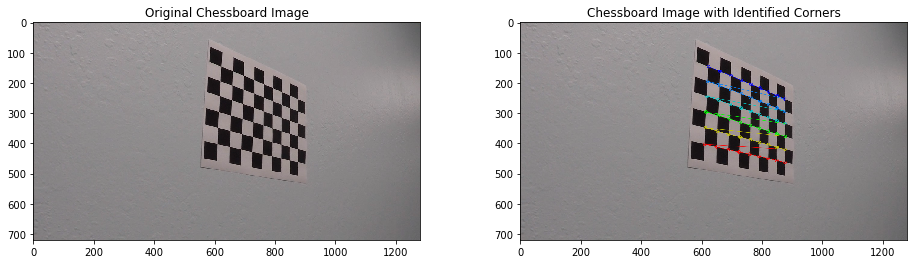

In [1]:
# Camera Calibration
# Compute the camera matrix and distortion coefficients.

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from os import path

%matplotlib qt
%matplotlib inline



# Take an image, object points, and image points,
# perform camera calibration, image distortion correction, and 
# return the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = sorted(glob.glob('./camera_cal/calibration*.jpg'))

# Step through the list of provided calibration images and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners (9 x 6)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, add object points, image points
    if ret == True:
        
        # Show original image in left subplot
        fig, ax = plt.subplots(1, 2, figsize=(16,4))
        ax[0].set_title('Original Chessboard Image')
        ax[0].imshow(img)
        
        # Object & Image points
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cc_img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        # Save image with corners
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", "_corners.png") 
        mpimg.imsave(outfname, cc_img)
        
        # Show image in external window
        # cv2.imshow('img',img)
        # cv2.waitKey(500)

        # Show image in right subplot with identified corners
        ax[1].set_title('Chessboard Image with Identified Corners')
        ax[1].imshow(cc_img)
        
        # Save plot as image
        outfname = outfname.replace("_corners.png", "_corners_plot.png") 
        plt.savefig(outfname, bbox_inches='tight')
                
cv2.destroyAllWindows()


### Image Undistortion

Undistort the chessboard images using the camera matrix and distortion coefficients from the previous cell.

Output images appear in the [./output_images](./output_images) folder.

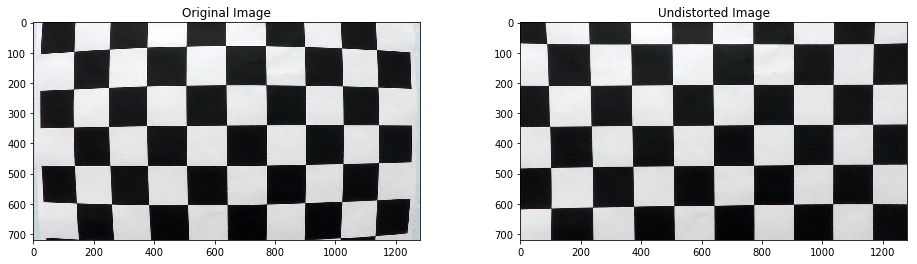

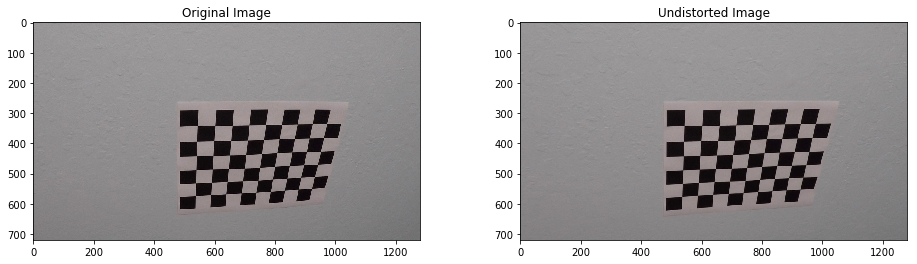

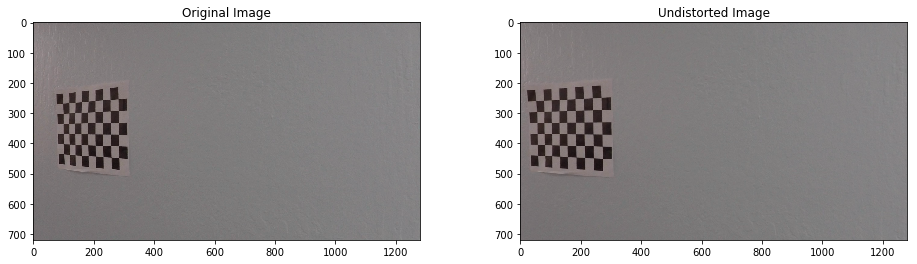

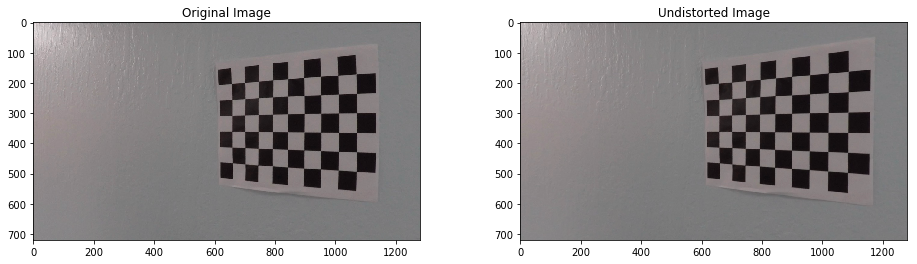

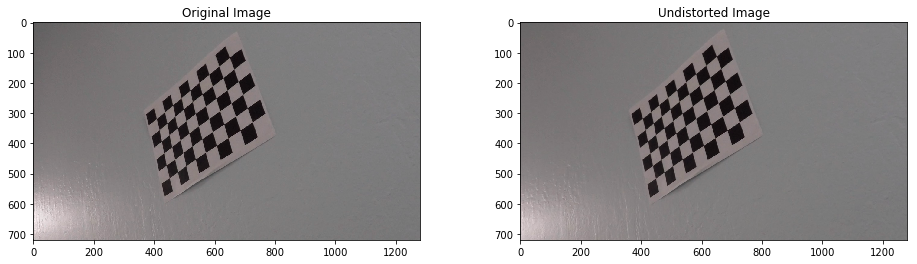

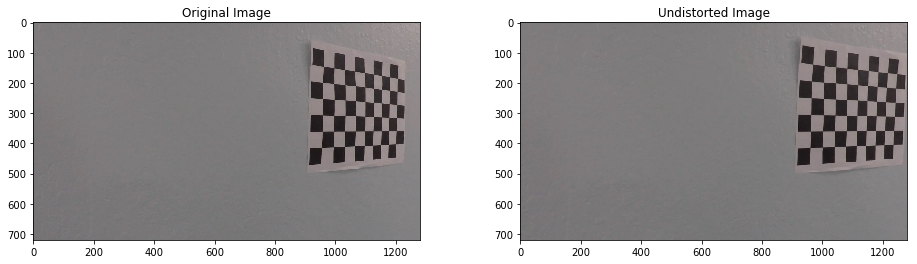

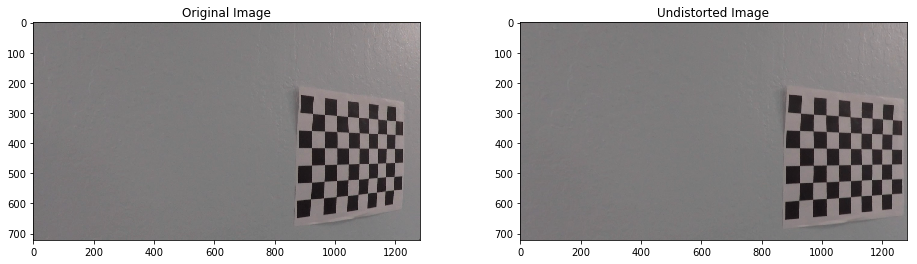

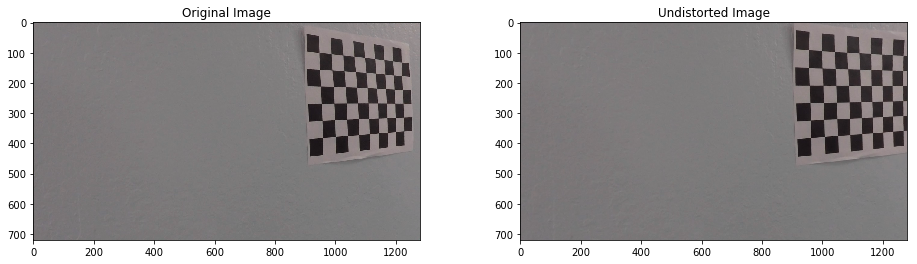

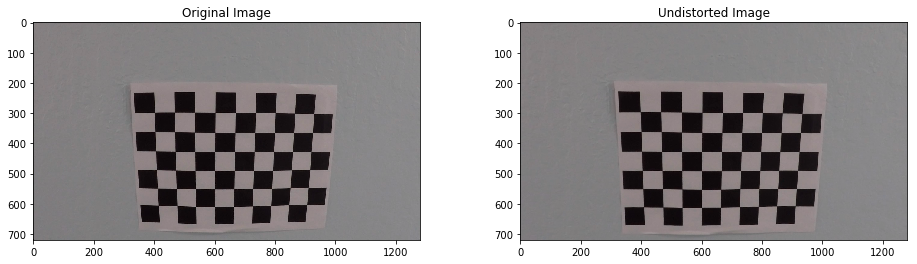

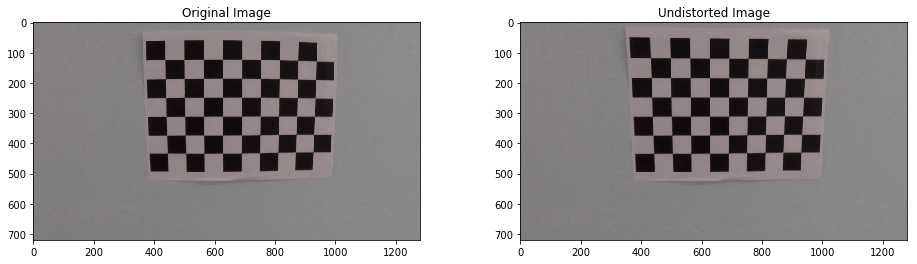

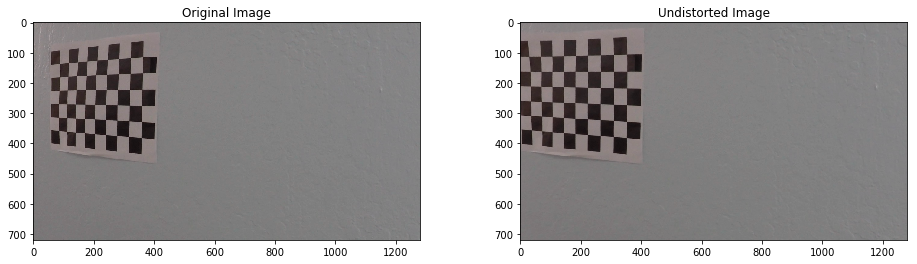

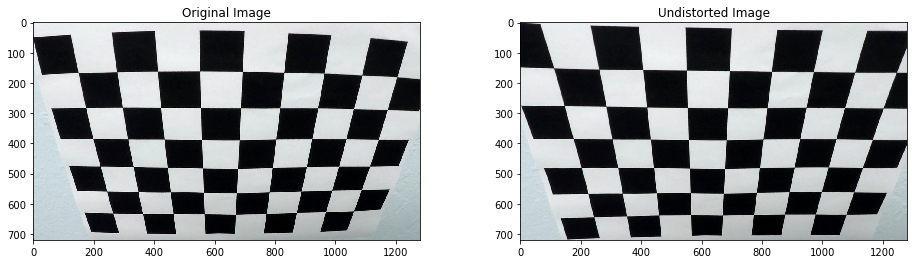

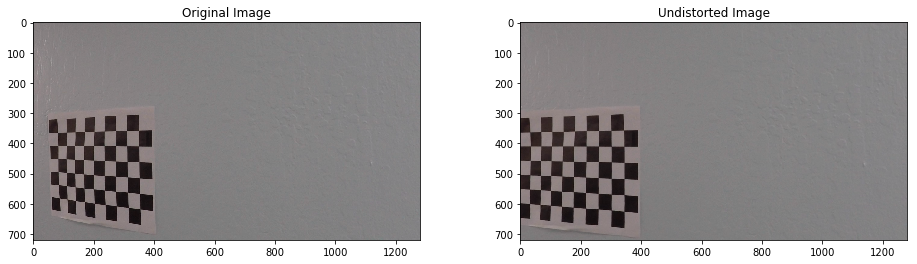

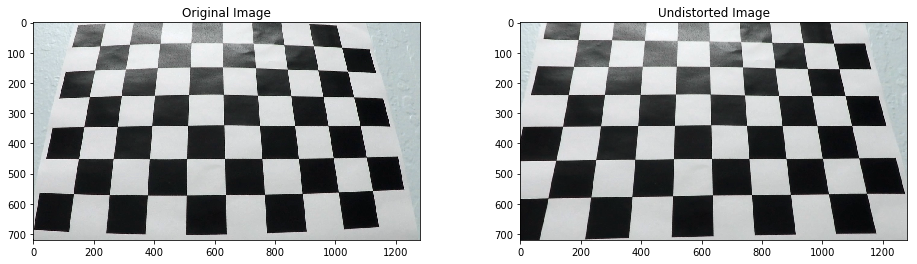

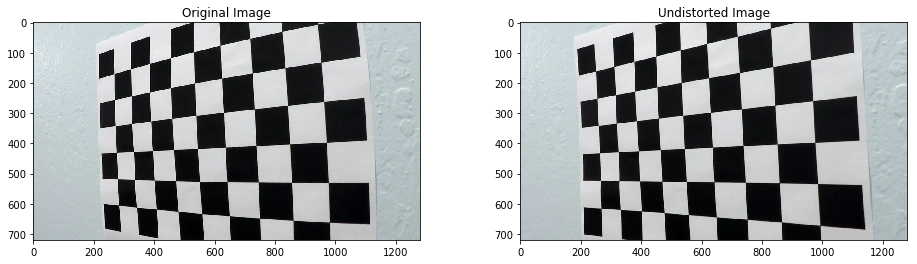

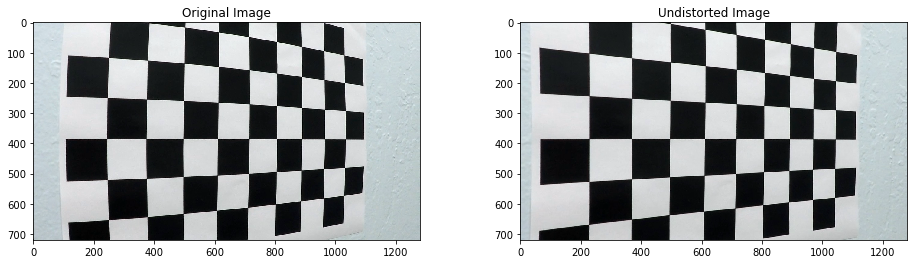

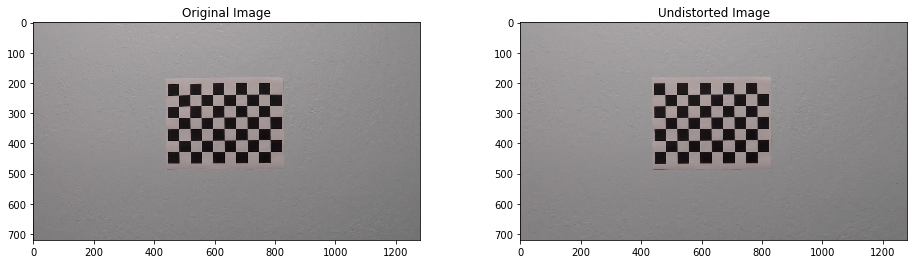

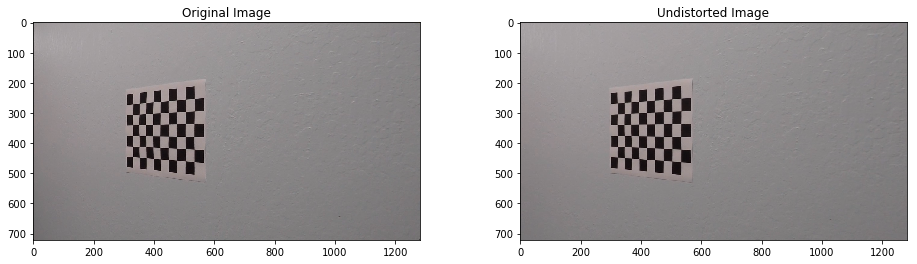

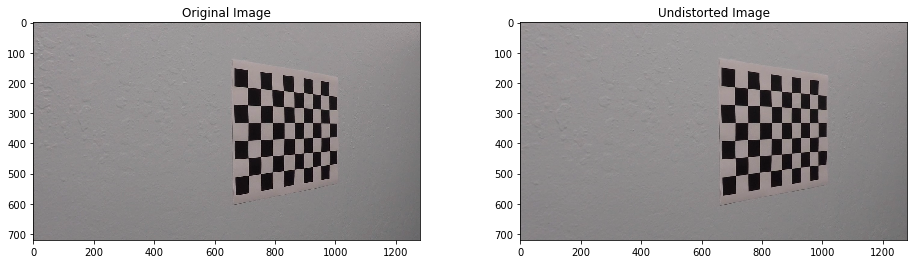

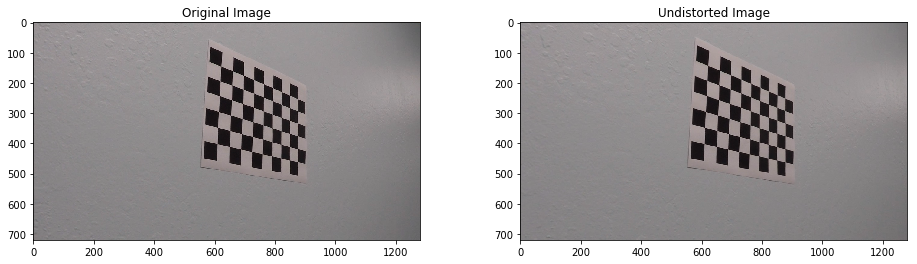

In [2]:
# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("camera_cal", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    mpimg.imsave(outfname, undistorted_img)
    
    # Show original and final output images
    fig, ax = plt.subplots(1, 2, figsize=(16,4))
    ax[0].set_title('Original Image')
    ax[0].imshow(img)
    ax[1].set_title('Undistorted Image')
    ax[1].imshow(undistorted_img)

    # Save plot as image
    outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

### Pipeline - Single (Still) Images

1. Provide an example of a distortion-corrected image.

In [ ]:
# Pipeline - Single (Still) Images
# 1. Provide an example of a distortion-corrected image.

print("Hello distortion correction!")

# # Show original and final output images
# fig, ax = plt.subplots(1, 2, figsize=(15,4))
# ax[0].set_title('Original Image')
# ax[0].imshow(cal_orig_img)
# ax[1].set_title('Undistorted (Calibrated) Image')
# ax[1].imshow(calibrated_img)

# plt.savefig('./output_images/calibration1_orig_cal.png', bbox_inches='tight')

2. Discuss how color transforms, gradients, or other methods to create a thresholded binary image were used.  Identify where this was used in the source code.  Provide an example of a binary image result.

In [ ]:
# Pipeline - Single (Still) Images
# 2. Discuss how color transforms, gradients, or other methods to create a thresholded binary image were used.  
#    Identify where this was used in the source code.  
#    Provide an example of a binary image result.

print("Hello 2. Discuss how color transforms, gradients, or other methods!")


3. Discuss how the perspective transform was performed.  Identify where this was used in the source code.  Provide an example of a resulting transformed image.  

In [ ]:
# Pipeline - Single (Still) Images
# 3. Discuss how the perspective transform was performed.  
#    Provide an example of a resulting transformed image.  

print("Hello Discuss how the perspective transform was performed!")

4. Discuss how lane-line pixels were identified, and how their positions were fit with a polynomial.  Identify where this was used in the source code.

In [ ]:
# Pipeline - Single (Still) Images
# 4. Discuss how lane-line pixels were identified, 
#    and how their positions were fit with a polynomial.  

print("Hello 4. Discuss how lane-line pixels were identified!")

5. Discuss how the radius of curvature of the lane and the position of the vehicle with respect to center were calculated.  Identify where this was used in the source code.

In [ ]:
# Pipeline - Single (Still) Images
# 5. Discuss how the radius of curvature of the lane and the position of the vehicle 
#    with respect to center were calculated .  

print("Hello 5. Discuss how the radius of curvature of the lane!")

6. Provide an example image of the result plotted back down onto the road such that the lane area is identified clearly.

In [ ]:
# Pipeline - Single (Still) Images
# 6. Provide an example image of the result plotted 
#    back down onto the road such that the lane area is identified clearly.

print("Hello 6. Provide an example image of the result plotted!")


### Video Pipeline

Provide a link to the final video output.  The pipeline should perform reasonably well on the entire project video.  In other words, wobbly lines are acceptable, but catastrophic failures that would cause the car to drive off the road are not!.

In [ ]:
# Video Pipeline
# Provide a link to the final video output.  
# The pipeline should perform reasonably well on the entire project video.  
# In other words, wobbly lines are acceptable, 
# but catastrophic failures that would cause the car to drive off the road are not!.

print("Hello Video Pipeline!")


### Final Discussion

Discuss any problems or issues you faced during the implementation of this project.  

In [ ]:
# Final Discussion
# Discuss any problems or issues you faced during the implementation of this project.  
# I like pizza.# I like pizza.# I like pizza.# I like pizza.# I like pizza.# I like pizza.
# I like pizza.# I like pizza.# I like pizza.# I like pizza.# I like pizza.# I like pizza.
# I like pizza.# I like pizza.# I like pizza.# I like pizza.# I like pizza.# I like pizza.